In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

This is a processed RNAseq dataset involving reading in quantitated gene expression data from an RNA-seq experiment, 
exploring the data using base R functions and then interpretation. The dataset contains an experiment between a diseased 
cell line and diseased cell lines treated with compound X. The difference in expression change between the two health status is 
computed as Fold change to log 2 (Log2FC) and the significance of each is computed in p-value.

# *Task 1*
Generate a volcano plot.


In [2]:
url <- "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt"
lines <- readLines(url) # Gave a warning

Warning message in readLines(url):
“incomplete final line found on 'https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt'”


In [3]:
#Investigating the warning
field_counts <- sapply(lines, function(x) length(strsplit(x, "\t")[[1]]))
# View distribution of column counts
table(field_counts) # Showed all fields had only one column(a single string with all inputs separated by a space)

field_counts
    1 
16407 

In [5]:
#Splitting the data
header <- strsplit(lines[1], " ")[[1]]
records <- strsplit(lines[-1], " ")
#Creating a dataframe
RNAseq <- as.data.frame(do.call(rbind, records), stringsAsFactors = FALSE)
colnames(RNAseq) <- header
head(RNAseq)

,Gene,log2FoldChange,pvalue,padj
,<chr>,<chr>,<chr>,<chr>
1,DOK6,0.51,1.861e-08,0.0003053
2,TBX5,-2.129,5.655e-08,0.0004191
3,SLC32A1,0.9003,7.664e-08,0.0004191
4,IFITM1,-1.687,3.735e-06,0.006809
5,NUP93,0.3659,3.373e-06,0.006809
6,EMILIN2,1.534,2.976e-06,0.006809


In [6]:
#Checking structure to ensure datatype accuracy
str(RNAseq)

'data.frame':	16406 obs. of  4 variables:
 $ Gene          : chr  "DOK6" "TBX5" "SLC32A1" "IFITM1" ...
 $ log2FoldChange: chr  "0.51" "-2.129" "0.9003" "-1.687" ...
 $ pvalue        : chr  "1.861e-08" "5.655e-08" "7.664e-08" "3.735e-06" ...
 $ padj          : chr  "0.0003053" "0.0004191" "0.0004191" "0.006809" ...


In [7]:
#Coverting all numeric columns to correct datatype
RNAseq$log2FoldChange <- as.numeric(RNAseq$log2FoldChange)
RNAseq$pvalue <- as.numeric(RNAseq$pvalue)
RNAseq$padj <- as.numeric(RNAseq$padj)
#Confirming datatypes 
str(RNAseq)

'data.frame':	16406 obs. of  4 variables:
 $ Gene          : chr  "DOK6" "TBX5" "SLC32A1" "IFITM1" ...
 $ log2FoldChange: num  0.51 -2.129 0.9 -1.687 0.366 ...
 $ pvalue        : num  1.86e-08 5.66e-08 7.66e-08 3.73e-06 3.37e-06 ...
 $ padj          : num  0.000305 0.000419 0.000419 0.006809 0.006809 ...


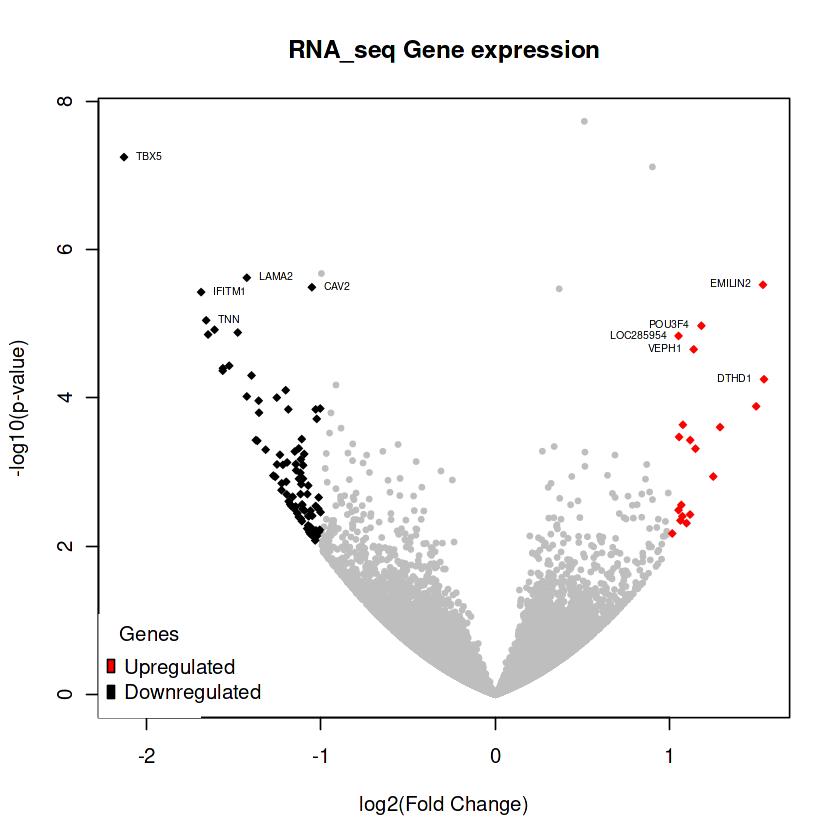

In [10]:
#creating the volcano plot
plot(RNAseq$log2FoldChange, -log10(RNAseq$pvalue),
                      pch = 20, cex = 0.7,
                      col = "grey",
                      main = "RNA_seq Gene expression",
                      xlab = "log2(Fold Change)",
                      ylab = "-log10(p-value)")
#*Task 2*
#Determine the upregulated genes (Genes with Log2FC > 1 and pvalue < 0.01)

#Upregulated genes
# Subset the data
upregulated <- subset(RNAseq, pvalue < 0.01 & log2FoldChange > 1)
#plotting upregulated genes
with(upregulated,
     points(log2FoldChange, -log10(pvalue), pch = 18, col = "red"))

#*Task 3*
#Determine the downregulated genes (Genes with Log2FC < -1 and pvalue < 0.01)

# Subset the data
downregulated <- subset(RNAseq, pvalue < 0.01 & log2FoldChange < -1)
#plotting downregulated genes
with(downregulated,
     points(log2FoldChange, -log10(pvalue), pch = 18, col = "black")) 
#Adding legend
legend("bottomleft", legend = c("Upregulated", "Downregulated"),
       title = "Genes", fill = c("red", "black"), box.lty = 0)

#*Task 4*
#What are the functions of the top 5 upregulated genes and top 5 downregulated genes. (Use genecards)

# Showing labels of top 5 up and down regulated genes on plot
text(upregulated$log2FoldChange[1:5], 
    -log10(upregulated$pvalue[1:5]), 
    labels = upregulated$Gene[1:5], pos = 2, cex = 0.5)

text(downregulated$log2FoldChange[1:5], 
    -log10(downregulated$pvalue[1:5]), 
    labels = downregulated$Gene[1:5], pos = 4, cex = 0.5)

In [15]:
#Printing the names of top up and down regulated genes
top_upregulated <- upregulated$Gene[1:5]
top_downregulated <- downregulated$Gene[1:5]
print(paste("Top 5 upregulated genes are:", list(top_upregulated),
            "Top 5 downregulated genes are:", list(top_downregulated)))

[1] "Top 5 upregulated genes are: c(\"EMILIN2\", \"POU3F4\", \"LOC285954\", \"VEPH1\", \"DTHD1\") Top 5 downregulated genes are: c(\"TBX5\", \"IFITM1\", \"LAMA2\", \"CAV2\", \"TNN\")"


For functions of Genes, check Transcriptomics text script within this visualization folder.